# Predicting an NBA Player's Position 
### Project Goal
> *The NBA is considered the most "positionless" major sport. The game has evolved to the point where 6'8" players could play any position, from guard to center. Can we use machine learning to predict an NBA player's position based on their in-game stats?*

### Data
> [NBA Player's Stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats)

### Libraries Used
> - Pandas
> - Numpy
> - Sklearn
> - Seaborn
> - Geopandas

### Machine Learning Algorithms Used
> - Decision Trees
> - Random Forest
> - K-Nearest Neighbors
> - Support Vector Machine


# 1. Reading/Cleaning Data

In [79]:
import pandas as pd
pd.set_option('display.max_columns', 500)

df = pd.read_csv("Seasons_Stats.csv")

df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [80]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

#### Finding columns with null values

In [81]:
df.drop(columns = ['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

#### Finding duplicated rows

In [82]:
df.duplicated().sum()

66

In [83]:
df['MPG'] = df['MP'] / df['G']

In [84]:
df.isna().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
MPG         553
dtype: int64

In [85]:
df[df['FT%'].isnull()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
79,1950.0,Normie Glick,F,22.0,MNL,1.0,NaN,NaN,NaN,1.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000,NaN,NaN,NaN,1.0,1.0,1.000,1.000,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN
132,1950.0,Lee Knorek,C,28.0,BLB,1.0,NaN,NaN,NaN,0.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.000,NaN,NaN,NaN,0.0,2.0,0.000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,0.0,NaN
175,1950.0,Murray Mitchell,C,26.0,AND,2.0,NaN,NaN,NaN,0.333,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.333,NaN,NaN,NaN,1.0,3.0,0.333,0.333,0.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,NaN
187,1950.0,Jim Nolan,C,22.0,PHW,5.0,NaN,NaN,NaN,0.190,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.2,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,4.0,21.0,0.190,NaN,NaN,NaN,4.0,21.0,0.190,0.190,0.0,0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,14.0,8.0,NaN
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24568,2017.0,Damjan Rudez,SF,30.0,ORL,45.0,0.0,314.0,6.3,0.466,0.727,0.0,1.7,7.1,4.3,9.2,1.9,0.3,9.3,13.6,NaN,-0.1,0.2,0.1,0.008,NaN,-2.8,-1.9,-4.7,-0.2,31.0,88.0,0.352,20.0,64.0,0.313,11.0,24.0,0.458,0.466,0.0,0.0,NaN,5.0,20.0,25.0,20.0,12.0,1.0,9.0,31.0,82.0,6.977778
24620,2017.0,Mike Tobey,C,22.0,CHO,2.0,0.0,25.0,-0.1,0.250,0.000,0.0,8.7,4.4,6.6,5.4,0.0,0.0,20.0,9.0,NaN,0.0,0.0,0.0,-0.070,NaN,-7.4,-1.5,-8.9,0.0,1.0,4.0,0.250,0.0,0.0,NaN,1.0,4.0,0.250,0.250,0.0,0.0,NaN,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,12.500000
24622,2017.0,Axel Toupane,SF,24.0,TOT,4.0,0.0,47.0,6.2,0.611,0.444,0.0,0.0,2.3,1.1,0.0,1.0,1.7,0.0,8.5,NaN,0.0,0.0,0.1,0.061,NaN,-2.8,-1.0,-3.8,0.0,5.0,9.0,0.556,1.0,4.0,0.250,4.0,5.0,0.800,0.611,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,11.0,11.750000
24623,2017.0,Axel Toupane,SF,24.0,MIL,2.0,0.0,6.0,-9.9,0.000,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6,NaN,0.0,0.0,0.0,-0.191,NaN,-9.2,-3.5,-12.7,0.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.000000


In [86]:
df[df['FT%'].isnull()].mean()['G']

4.301864801864802

In [87]:
df[df['FT%'].isnull()].mean()['MP']

26.24970691676436

In [88]:
df[df['FT%'].isnull()].mean()['MPG']

5.798066690777163

In [89]:
all_years = df.copy()
df = df[df['Year'] >= 2010]
df = df[(df['G'] >= 20) & (df['MPG'] >= 15)]
df.shape

(2845, 53)

In [90]:
df.fillna(0, inplace=True)

#### Finding the different positions in the dataset
> Some positions have multiple values, such as "PF-SF". To fix this, I filtered the dataset by the specific values, and changed the positions to make it uniform.

In [91]:
df['Pos'].value_counts()

SG       601
PG       590
PF       568
SF       566
C        481
SG-PG      7
PF-SF      7
SF-PF      6
PG-SG      6
SG-SF      4
SF-SG      3
PF-C       3
C-PF       2
SG-PF      1
Name: Pos, dtype: int64

In [92]:
df[df['Pos'] == 'PF-SF']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20216,2010.0,Jared Jeffries,PF-SF,28.0,TOT,70.0,37.0,1794.0,9.8,0.507,0.226,0.382,8.1,10.3,9.1,8.0,1.8,2.9,17.2,11.1,0.0,0.9,1.3,2.2,0.058,0.0,-1.8,2.1,0.3,1.0,138.0,314.0,0.439,21.0,71.0,0.296,117.0,243.0,0.481,0.473,75.0,120.0,0.625,130.0,158.0,288.0,101.0,62.0,71.0,76.0,203.0,372.0,25.628571
20401,2010.0,James Singleton,PF-SF,28.0,TOT,57.0,3.0,977.0,11.4,0.452,0.146,0.244,12.6,20.0,16.3,4.8,1.5,3.3,14.8,15.4,0.0,-0.1,1.2,1.1,0.056,0.0,-3.0,1.4,-1.6,0.1,97.0,254.0,0.382,7.0,37.0,0.189,90.0,217.0,0.415,0.396,53.0,62.0,0.855,108.0,168.0,276.0,31.0,28.0,43.0,49.0,113.0,254.0,17.140351
20725,2011.0,Danilo Gallinari,PF-SF,22.0,TOT,62.0,60.0,2104.0,15.7,0.597,0.458,0.611,3.2,13.4,8.3,7.4,1.2,0.9,9.3,18.9,0.0,4.9,1.2,6.1,0.139,0.0,2.1,-1.6,0.5,1.3,265.0,640.0,0.414,103.0,293.0,0.352,162.0,347.0,0.467,0.495,337.0,391.0,0.862,59.0,246.0,305.0,104.0,51.0,27.0,83.0,144.0,970.0,33.935484
20753,2011.0,Jeff Green,PF-SF,24.0,TOT,75.0,51.0,2427.0,12.9,0.538,0.257,0.298,3.7,13.5,8.8,7.2,1.1,1.1,9.6,19.5,0.0,2.4,2.4,4.8,0.095,0.0,-0.4,-0.4,-0.8,0.7,368.0,820.0,0.449,64.0,211.0,0.303,304.0,609.0,0.499,0.488,198.0,244.0,0.811,73.0,287.0,360.0,108.0,53.0,37.0,99.0,210.0,998.0,32.360000
22048,2013.0,Marcus Morris,PF-SF,23.0,TOT,77.0,23.0,1524.0,11.3,0.516,0.443,0.222,6.0,14.6,10.3,6.4,1.5,1.0,11.8,18.9,0.0,0.6,1.2,1.8,0.058,0.0,-1.0,-1.0,-1.9,0.0,222.0,526.0,0.422,86.0,233.0,0.369,136.0,293.0,0.464,0.504,66.0,117.0,0.564,80.0,197.0,277.0,62.0,45.0,20.0,77.0,160.0,596.0,19.792208
22625,2014.0,Luc Mbah,PF-SF,27.0,TOT,64.0,7.0,1003.0,8.3,0.503,0.088,0.347,6.0,10.1,8.0,5.1,1.5,1.1,15.2,11.2,0.0,0.2,0.8,1.0,0.049,0.0,-3.0,0.6,-2.4,-0.1,87.0,193.0,0.451,4.0,17.0,0.235,83.0,176.0,0.472,0.461,46.0,67.0,0.687,56.0,90.0,146.0,36.0,30.0,14.0,40.0,68.0,224.0,15.671875
23439,2015.0,Lance Thomas,PF-SF,26.0,TOT,62.0,37.0,1490.0,8.0,0.456,0.050,0.224,4.8,9.9,7.3,7.4,1.3,0.4,13.2,17.0,0.0,-0.9,0.4,-0.4,-0.014,0.0,-4.1,-1.6,-5.7,-1.4,182.0,442.0,0.412,7.0,22.0,0.318,175.0,420.0,0.417,0.420,72.0,99.0,0.727,65.0,130.0,195.0,69.0,37.0,8.0,74.0,101.0,443.0,24.032258


In [93]:
df[df['Pos'] == 'PG-SG']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20164,2010.0,Eddie House,PG-SG,31.0,TOT,68.0,0.0,1217.0,10.5,0.495,0.499,0.114,1.3,9.3,5.3,11.0,1.7,0.5,9.0,20.0,0.0,0.0,1.1,1.1,0.042,0.0,-1.4,-1.8,-3.2,-0.4,173.0,455.0,0.380,79.0,227.0,0.348,94.0,228.0,0.412,0.467,48.0,52.0,0.923,13.0,96.0,109.0,85.0,40.0,7.0,47.0,81.0,473.0,17.897059
20705,2011.0,Raymond Felton,PG-SG,26.0,TOT,75.0,54.0,2737.0,16.6,0.524,0.327,0.240,2.0,9.2,5.6,35.8,2.3,0.3,16.6,21.6,0.0,3.6,1.8,5.4,0.094,0.0,2.0,-1.7,0.3,1.6,427.0,1005.0,0.425,116.0,329.0,0.353,311.0,676.0,0.460,0.483,194.0,241.0,0.805,48.0,221.0,269.0,625.0,125.0,11.0,221.0,150.0,1164.0,36.493333
22020,2013.0,Eric Maynor,PG-SG,25.0,TOT,64.0,0.0,963.0,9.3,0.472,0.342,0.221,1.1,4.4,2.8,28.7,1.2,0.1,20.4,18.4,0.0,-0.1,0.3,0.2,0.008,0.0,-3.0,-4.4,-7.4,-1.3,106.0,281.0,0.377,34.0,96.0,0.354,72.0,185.0,0.389,0.438,45.0,62.0,0.726,9.0,37.0,46.0,182.0,22.0,1.0,79.0,55.0,291.0,15.046875
22080,2013.0,Jeremy Pargo,PG-SG,26.0,TOT,39.0,11.0,655.0,10.4,0.478,0.296,0.248,1.3,7.5,4.3,23.0,1.0,0.2,15.3,22.5,0.0,-0.2,0.1,0.0,-0.002,0.0,-2.4,-3.9,-6.3,-0.7,99.0,250.0,0.396,25.0,74.0,0.338,74.0,176.0,0.420,0.446,42.0,62.0,0.677,8.0,41.0,49.0,92.0,13.0,2.0,50.0,46.0,265.0,16.794872
23193,2015.0,Brandon Knight,PG-SG,23.0,TOT,63.0,61.0,2035.0,17.1,0.543,0.361,0.251,1.6,12.0,6.8,27.4,2.3,0.4,16.1,25.9,0.0,2.0,2.5,4.5,0.106,0.0,1.7,-0.7,1.1,1.6,375.0,888.0,0.422,125.0,321.0,0.389,250.0,567.0,0.441,0.493,195.0,223.0,0.874,28.0,216.0,244.0,330.0,90.0,10.0,189.0,114.0,1070.0,32.301587
23356,2015.0,Austin Rivers,PG-SG,22.0,TOT,76.0,5.0,1563.0,10.3,0.481,0.264,0.254,2.0,8.9,5.5,14.7,1.6,0.7,10.5,17.9,0.0,0.5,1.0,1.5,0.046,0.0,-1.7,-1.2,-2.9,-0.4,203.0,496.0,0.409,39.0,131.0,0.298,164.0,365.0,0.449,0.449,85.0,126.0,0.675,27.0,125.0,152.0,155.0,48.0,14.0,65.0,146.0,530.0,20.565789


In [94]:
df[df['Pos'] == 'C-PF']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20111,2010.0,Drew Gooden,C-PF,28.0,TOT,70.0,33.0,1755.0,16.9,0.547,0.013,0.359,13.7,21.9,17.8,4.4,1.2,2.5,13.4,21.0,0.0,2.3,2.2,4.4,0.121,0.0,-1.6,-0.3,-1.9,0.0,288.0,602.0,0.478,1.0,8.0,0.125,287.0,594.0,0.483,0.479,186.0,216.0,0.861,207.0,335.0,542.0,47.0,41.0,58.0,108.0,194.0,763.0,25.071429
21802,2013.0,Ed Davis,C-PF,23.0,TOT,81.0,28.0,1631.0,17.8,0.561,0.000,0.346,10.9,22.8,16.7,6.7,1.2,4.2,10.2,17.6,0.0,2.9,2.4,5.4,0.159,0.0,-0.8,1.6,0.8,1.1,260.0,482.0,0.539,0.0,0.0,0.000,260.0,482.0,0.539,0.539,103.0,167.0,0.617,152.0,308.0,460.0,63.0,38.0,85.0,63.0,191.0,623.0,20.135802


In [95]:
df[df['Pos'] == 'SG-SF']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20459,2010.0,Henry Walker,SG-SF,22.0,TOT,35.0,13.0,768.0,14.6,0.649,0.500,0.211,2.2,11.0,6.5,8.3,1.5,0.3,9.9,16.6,0.0,1.6,0.3,1.9,0.121,0.0,1.9,-1.8,0.1,0.4,120.0,232.0,0.517,50.0,116.0,0.431,70.0,116.0,0.603,0.625,39.0,49.0,0.796,15.0,73.0,88.0,40.0,23.0,3.0,28.0,83.0,329.0,21.942857
20956,2011.0,Mickael Pietrus,SG-SF,28.0,TOT,57.0,4.0,1107.0,9.8,0.526,0.647,0.156,1.6,11.5,6.6,4.6,1.3,1.4,9.1,17.6,0.0,0.3,1.0,1.3,0.055,0.0,-0.7,-0.7,-1.4,0.2,143.0,365.0,0.392,85.0,236.0,0.360,58.0,129.0,0.450,0.508,39.0,57.0,0.684,15.0,111.0,126.0,33.0,29.0,21.0,39.0,101.0,410.0,19.421053
21850,2013.0,Francisco Garcia,SG-SF,31.0,TOT,58.0,20.0,1029.0,11.0,0.519,0.597,0.070,0.9,9.4,5.1,9.2,2.3,2.9,9.4,14.7,0.0,0.6,0.6,1.3,0.059,0.0,-0.5,0.1,-0.4,0.4,118.0,300.0,0.393,67.0,179.0,0.374,51.0,121.0,0.421,0.505,18.0,21.0,0.857,8.0,83.0,91.0,63.0,46.0,38.0,32.0,88.0,321.0,17.741379
22733,2014.0,John Salmons,SG-SF,34.0,TOT,78.0,8.0,1726.0,7.8,0.462,0.395,0.126,1.3,9.6,5.5,12.8,1.4,0.9,11.0,12.8,0.0,0.2,1.4,1.7,0.046,0.0,-2.2,0.1,-2.1,0.0,150.0,413.0,0.363,63.0,163.0,0.387,87.0,250.0,0.348,0.439,40.0,52.0,0.769,20.0,143.0,163.0,147.0,47.0,19.0,54.0,124.0,403.0,22.128205


In [96]:
df[df['Pos'] == 'SG-PF']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20204,2010.0,Stephen Jackson,SG-PF,31.0,TOT,81.0,81.0,3129.0,15.6,0.518,0.277,0.306,3.0,12.2,7.7,17.7,2.2,1.1,13.9,27.5,0.0,0.5,4.6,5.0,0.077,0.0,0.3,0.5,0.8,2.2,600.0,1418.0,0.423,129.0,393.0,0.328,471.0,1025.0,0.46,0.469,338.0,434.0,0.779,78.0,323.0,401.0,300.0,132.0,43.0,259.0,197.0,1667.0,38.62963


In [97]:
df[df['Pos'] == 'PF-C']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
20015,2010.0,Marcus Camby,PF-C,35.0,TOT,74.0,74.0,2314.0,17.9,0.501,0.014,0.244,12.7,31.9,22.2,12.3,2.2,4.8,14.1,12.8,0.0,2.5,4.3,6.8,0.142,0.0,-1.0,5.5,4.5,3.8,238.0,501.0,0.475,2.0,7.0,0.286,236.0,494.0,0.478,0.477,78.0,122.0,0.639,249.0,622.0,871.0,186.0,95.0,146.0,91.0,161.0,556.0,31.270270
20435,2010.0,Tyrus Thomas,PF-C,23.0,TOT,54.0,3.0,1220.0,16.8,0.511,0.007,0.417,7.8,23.6,15.9,7.8,2.7,5.5,15.6,22.1,0.0,-0.3,2.9,2.6,0.103,0.0,-3.9,4.0,0.1,0.6,194.0,420.0,0.462,0.0,3.0,0.000,194.0,417.0,0.465,0.462,120.0,175.0,0.686,81.0,254.0,335.0,56.0,63.0,85.0,92.0,129.0,508.0,22.592593
23682,2016.0,Channing Frye,PF-C,32.0,TOT,70.0,32.0,1200.0,12.9,0.586,0.677,0.101,3.2,18.6,10.9,8.7,1.2,1.9,10.6,15.1,0.0,1.6,1.3,3.0,0.119,0.0,0.5,0.0,0.5,0.7,152.0,347.0,0.438,91.0,235.0,0.387,61.0,112.0,0.545,0.569,30.0,35.0,0.857,35.0,199.0,234.0,71.0,29.0,28.0,43.0,127.0,425.0,17.142857


In [98]:
def change_pos(pos):
    if pos == 'PF-SF':
        return 'SF'
    if pos == 'SG-PG':
        return 'PG'
    if pos == 'PG-SG':
        return 'PG'
    if pos == 'SF-PF':
        return 'SF'
    if pos == 'C-PF':
        return 'PF'
    if pos == 'SG-SF':
        return 'SG'
    if pos == 'SF-SG':
        return 'SF'
    if pos == 'PF-C':
        return 'PF'
    if pos == 'SG-PF':
        return 'SF'
    if pos == 'C-SF':
        return 'C'
    else:
        return pos
        
df['Pos'] = df['Pos'].apply(lambda x : change_pos(x))
df['Pos'].value_counts()

SG    605
PG    603
SF    583
PF    573
C     481
Name: Pos, dtype: int64

# 2. Merging dataset of players heights/weights

In [99]:
info = pd.read_csv("Players.csv")
info = info[['Player', 'height', 'weight']]
info.head()

,Player,height,weight
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0


In [100]:
df = df.merge(info, on = 'Player', how = 'left')
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,height,weight
0,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,75.0,2221.0,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,0.0,2.8,1.4,4.3,0.092,0.0,0.8,-0.5,0.3,1.3,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,724.0,27.085366,196.0,95.0
1,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,2922.0,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,0.0,5.5,3.3,8.8,0.145,0.0,0.9,0.6,1.6,2.6,579.0,1169.0,0.495,5.0,16.0,0.313,574.0,1153.0,0.498,0.497,230.0,304.0,0.757,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,1393.0,37.461538,211.0,117.0
2,2010.0,Ray Allen,SG,34.0,BOS,80.0,80.0,2819.0,15.2,0.601,0.410,0.260,2.0,8.8,5.5,12.3,1.2,0.7,10.6,20.2,0.0,5.1,2.9,7.9,0.135,0.0,2.3,-0.7,1.7,2.6,464.0,973.0,0.477,145.0,399.0,0.363,319.0,574.0,0.556,0.551,231.0,253.0,0.913,45.0,208.0,253.0,210.0,64.0,25.0,129.0,182.0,1304.0,35.237500,203.0,99.0
3,2010.0,Tony Allen,SG,28.0,BOS,54.0,8.0,889.0,14.2,0.540,0.020,0.470,7.4,12.5,10.0,13.0,3.5,1.7,17.8,19.6,0.0,0.2,1.6,1.9,0.100,0.0,-1.8,2.6,0.8,0.6,129.0,253.0,0.510,0.0,5.0,0.000,129.0,248.0,0.520,0.510,72.0,119.0,0.605,52.0,93.0,145.0,72.0,59.0,19.0,66.0,109.0,330.0,16.462963,193.0,96.0
4,2010.0,Rafer Alston,PG,33.0,TOT,52.0,38.0,1421.0,8.2,0.443,0.377,0.182,1.0,9.7,5.3,20.2,1.9,0.5,16.5,18.8,0.0,-1.6,1.2,-0.4,-0.013,0.0,-2.9,-0.8,-3.7,-0.6,155.0,446.0,0.348,58.0,168.0,0.345,97.0,278.0,0.349,0.413,59.0,81.0,0.728,13.0,116.0,129.0,176.0,50.0,10.0,95.0,103.0,427.0,27.326923,188.0,77.0


In [101]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'MPG', 'height', 'weight'],
      dtype='object')

In [102]:
df.fillna(0, inplace=True)
df.isna().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
blanl     0
OWS       0
DWS       0
WS        0
WS/48     0
blank2    0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
MPG       0
height    0
weight    0
dtype: int64

# 3. Grouping by Position and finding averages by position

In [103]:
by_pos = df.groupby('Pos').mean()
by_pos.head()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG,height,weight
Pos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,2013.569647,26.802495,61.904366,40.632017,1541.937630,16.598337,0.555112,0.037717,0.367597,10.129314,21.986486,16.052391,8.512890,1.282536,3.603119,14.244075,18.460707,0.0,2.100208,2.099584,4.199376,0.123684,0.0,-1.177547,1.566320,0.385655,1.105405,253.937630,492.577963,0.519077,7.461538,22.338877,0.116615,246.476091,470.239085,0.526316,0.525283,119.390852,175.122661,0.674717,137.627859,305.519751,443.147609,84.359667,38.498960,70.230769,88.272349,157.498960,634.727651,24.453518,210.908524,114.222453
PF,2013.568935,26.745201,61.783595,33.980803,1567.617801,15.379930,0.537162,0.167290,0.286969,7.903665,19.001745,13.437347,9.198604,1.429494,2.070157,11.978360,19.360384,0.0,1.994590,1.820768,3.816056,0.107792,0.0,-0.701920,0.428970,-0.272426,0.905759,261.890052,548.307155,0.474431,30.982548,88.781850,0.226024,230.907504,459.525305,0.497984,0.503468,115.764398,157.862129,0.719326,108.033159,266.425829,374.458988,93.026178,43.743455,41.438045,80.422339,144.113438,670.527051,24.877918,205.436300,106.579407
PG,2013.570481,26.817579,60.407960,34.220564,1616.782753,14.680929,0.524381,0.330415,0.251323,2.083250,9.748922,5.907629,27.847098,1.893035,0.546434,15.922222,20.845439,0.0,1.978773,1.340133,3.318076,0.086706,0.0,0.666501,-1.165672,-0.499834,0.910945,253.076285,586.723051,0.423972,65.500829,183.257048,0.338507,187.575456,403.466003,0.456342,0.482255,128.620232,158.300166,0.796927,30.431177,141.611940,172.043118,289.530680,61.207297,11.472637,119.729685,116.908789,700.273632,26.261474,190.111111,87.495854
SF,2013.578045,27.090909,62.049743,35.713551,1639.550600,13.015609,0.532441,0.360063,0.246926,3.696913,13.850086,8.770154,10.634477,1.636364,1.222642,11.538765,18.350772,0.0,1.639108,1.572384,3.210635,0.084213,0.0,-0.323499,-0.050943,-0.374099,0.926930,241.830189,549.497427,0.433201,66.274443,186.511149,0.338396,175.555746,362.986278,0.477736,0.496520,115.332762,147.910806,0.762141,53.506003,203.728988,257.234991,116.590051,53.497427,25.970840,80.603774,120.931389,665.267581,25.918923,201.144082,97.373928
SG,2013.528926,27.031405,61.480992,32.114050,1638.849587,13.405289,0.534098,0.377689,0.235301,2.378347,10.445620,6.406446,14.005620,1.658512,0.783967,11.676529,20.280992,0.0,1.673554,1.310248,2.985289,0.080808,0.0,0.217521,-1.002314,-0.785455,0.689587,260.504132,602.737190,0.427152,79.229752,216.819835,0.352693,181.274380,385.917355,0.464149,0.495760,121.442975,150.371901,0.795979,33.892562,150.735537,184.628099,145.760331,53.667769,16.464463,87.766942,115.264463,721.680992,26.256229,195.847934,92.400000


In [104]:
year_pos = all_years.groupby(['Pos', 'Year'], as_index=False).mean()
year_pos = year_pos[year_pos['Year'] >= 1980]
year_pos.head()

,Pos,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
30,C,1980.0,26.830769,56.969231,41.000000,1460.076923,14.024615,0.520292,0.003277,0.360692,9.983077,21.292308,15.673846,9.967692,1.223077,2.395385,17.395385,17.252308,NaN,1.709231,1.895385,3.612308,0.095646,NaN,-1.389231,0.918462,-0.469231,1.149231,241.630769,477.461538,0.483723,0.184615,1.692308,0.084973,241.446154,475.769231,0.484954,0.483877,122.492308,170.261538,0.675937,130.092308,287.138462,417.230769,118.230769,40.430769,61.923077,107.984615,167.815385,605.938462,23.244062
31,C,1981.0,26.875000,60.015625,27.333333,1458.921875,12.854687,0.511016,0.003156,0.369203,10.271875,20.129687,15.184375,9.384375,1.296875,2.293750,18.493750,17.781250,NaN,1.681250,1.806250,3.495312,0.075203,NaN,-1.856250,0.620313,-1.229688,1.015625,245.406250,485.968750,0.474594,0.218750,1.390625,0.122212,245.187500,484.578125,0.475672,0.474828,131.890625,183.406250,0.663967,123.781250,270.203125,393.984375,107.390625,36.140625,62.265625,108.171875,172.875000,622.921875,21.498328
32,C,1982.0,27.106061,58.469697,29.484848,1372.075758,12.683333,0.532909,0.004212,0.409970,8.401515,19.362121,13.856061,8.589394,1.086364,2.513636,18.125758,16.928788,NaN,1.487879,1.798485,3.287879,0.082076,NaN,-1.992424,0.869697,-1.121212,0.893939,233.121212,455.151515,0.496545,0.393939,1.954545,0.187412,232.727273,453.196970,0.497773,0.496939,125.651515,172.606061,0.675719,115.469697,256.393939,371.863636,86.606061,32.000000,66.409091,100.106061,174.484848,592.287879,20.941642
33,C,1983.0,27.045455,52.511364,23.795455,1170.795455,12.153409,0.502420,0.004489,0.355636,9.700000,18.947727,14.300000,7.997727,1.177273,2.560227,18.667045,17.021591,NaN,1.082955,1.486364,2.569318,0.069761,NaN,-2.327273,0.667045,-1.663636,0.695455,195.693182,390.125000,0.469545,0.204545,1.636364,0.054604,195.488636,388.488636,0.471080,0.469750,101.147727,141.965909,0.645174,101.670455,216.988636,318.659091,79.818182,29.511364,57.681818,93.056818,149.727273,492.738636,19.563003
34,C,1984.0,27.478261,63.014493,30.985507,1452.072464,12.649275,0.537420,0.003232,0.376986,9.437681,19.234783,14.328986,7.914493,1.024638,2.339130,17.485507,17.801449,NaN,1.401449,1.814493,3.217391,0.075522,NaN,-1.952174,0.511594,-1.440580,0.872464,248.434783,484.086957,0.498290,0.304348,2.130435,0.124541,248.130435,481.956522,0.499420,0.498507,138.666667,190.550725,0.688242,120.347826,263.637681,383.985507,92.811594,34.391304,64.811594,109.086957,181.869565,635.840580,20.620925


In [105]:
#only using percentages
df.columns
per = df[['Year', 'Player', 'Pos', 'Age', 'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']]

In [106]:
non_per = df[['Year', 'Player', 'Pos', 'Age', 'PER', '3PAr', 'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3PA', '2PA', 'ORB', 'TRB', 'AST','STL','BLK','TOV']]

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np


# 4. Exploratory Data Analysis

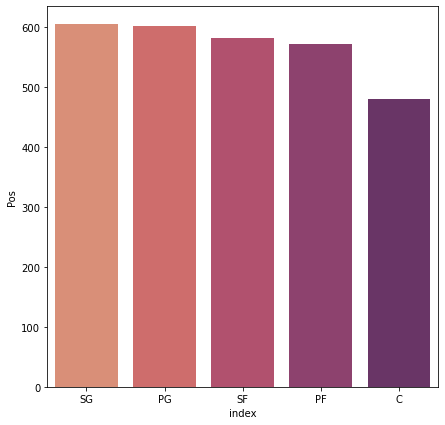

In [108]:
counts = df['Pos'].value_counts().reset_index()
plt.figure(figsize = (7,7))
sns.barplot(x = 'index', y = 'Pos', data = counts, palette = "flare")
plt.show()

> There are significantly less centers in the dataset. This is because shooting guards and point guards make up "Guards", small forwards and power forwards make up "Forwards", but only centers are included in "Centers"

In [109]:
c = year_pos[year_pos['Pos'] == 'C']
pf = year_pos[year_pos['Pos'] == 'PF']
sf = year_pos[year_pos['Pos'] == 'SF']
sg = year_pos[year_pos['Pos'] == 'SG']
pg = year_pos[year_pos['Pos'] == 'PG']

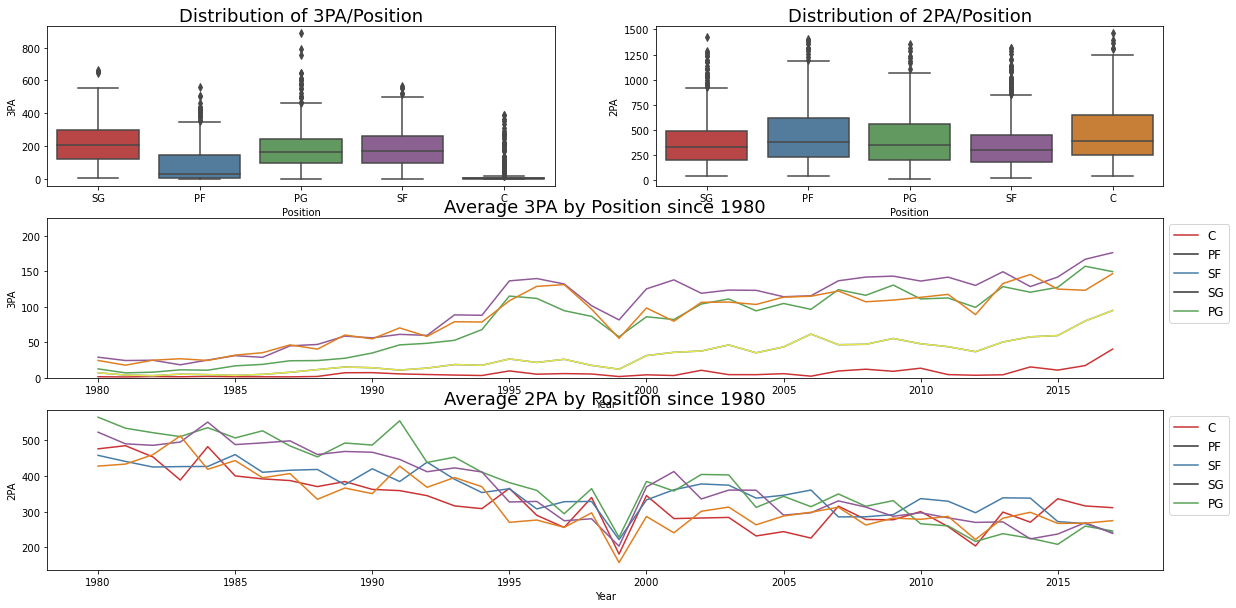

In [110]:
sns.set_palette("Set1", 8, .75)

gs = gridspec.GridSpec(3,2)
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
sns.boxplot(x = 'Pos', y = '3PA', data = df)
ax1.set_title("Distribution of 3PA/Position", {'fontsize' : 18.0})
ax1.set_xlabel("Position")
ax1.set_ylabel("3PA")

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 0
sns.boxplot(x = 'Pos', y = '2PA', data = df)
ax2.set_title("Distribution of 2PA/Position",{'fontsize' : 18.0} )
ax2.set_xlabel("Position")
ax2.set_ylabel("2PA")


ax3 = fig.add_subplot(gs[1,:]) # row 0, col 0
ax3.set_title("Average 3PA by Position since 1980", {'fontsize' : 18.0})
ax3.set_ylim(0,225)

sns.lineplot(x = 'Year', y = '3PA', data = c, style = 'Pos')
sns.lineplot(x = 'Year', y = '3PA', data = pf, style = 'Pos')
sns.lineplot(x = 'Year', y = '3PA', data = sf, style = 'Pos')
sns.lineplot(x = 'Year', y = '3PA', data = sg, style = 'Pos')
sns.lineplot(x = 'Year', y = '3PA', data = pg, style = 'Pos')
sns.lineplot(x = 'Year', y = '3PA', data = pf, style = 'Pos')
plt.legend(bbox_to_anchor=(1, 1),labels=['C','PF','SF','SG','PG'], loc='upper left', prop={"size": 12})


ax4 = fig.add_subplot(gs[2,:])
sns.lineplot(x = 'Year', y = '2PA', data = c, style = 'Pos', label='C')
sns.lineplot(x = 'Year', y = '2PA', data = pf, style = 'Pos', label='PF')
sns.lineplot(x = 'Year', y = '2PA', data = sf, style = 'Pos', label='SF')
sns.lineplot(x = 'Year', y = '2PA', data = sg, style = 'Pos', label='SG')
sns.lineplot(x = 'Year', y = '2PA', data = pg, style = 'Pos', label='PG')
ax4.set_title("Average 2PA by Position since 1980", {'fontsize' : 18.0})

fig.savefig('dist1.png')
plt.legend(bbox_to_anchor=(1, 1),labels=['C','PF','SF','SG','PG'] ,loc='upper left', prop = {"size" : 12})


> - Guards shoot more threes than forwards or centers  
> - Centers and power fowards shoot more two pointers than guards or small forwards  
> - The average 3PA by position has increased significantly since 1980 for every position  
> - Conversely, the average 2PA by position has decreased since 1980 for every position  

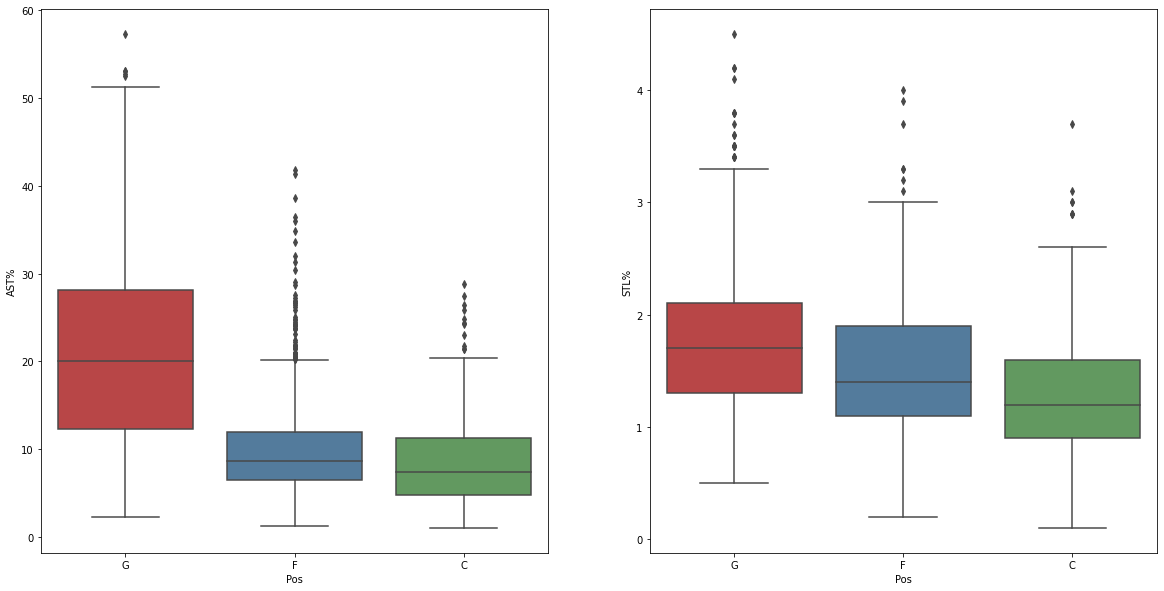

In [138]:
gs = gridspec.GridSpec(1,2)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(gs[0,0])
sns.boxplot(x = 'Pos', y = 'AST%', data = df)


ax2 = fig.add_subplot(gs[0,1])
sns.boxplot(x = 'Pos', y = 'STL%', data = df)

fig.savefig('dist2.png')

plt.show()

> - Point guards have a much higher AST% and STL% than any other position  
> - Guards in general have a higher AST% and STL% than any position because they spend the most time with the ball in their hands, and defending other players that have the ball in their hands

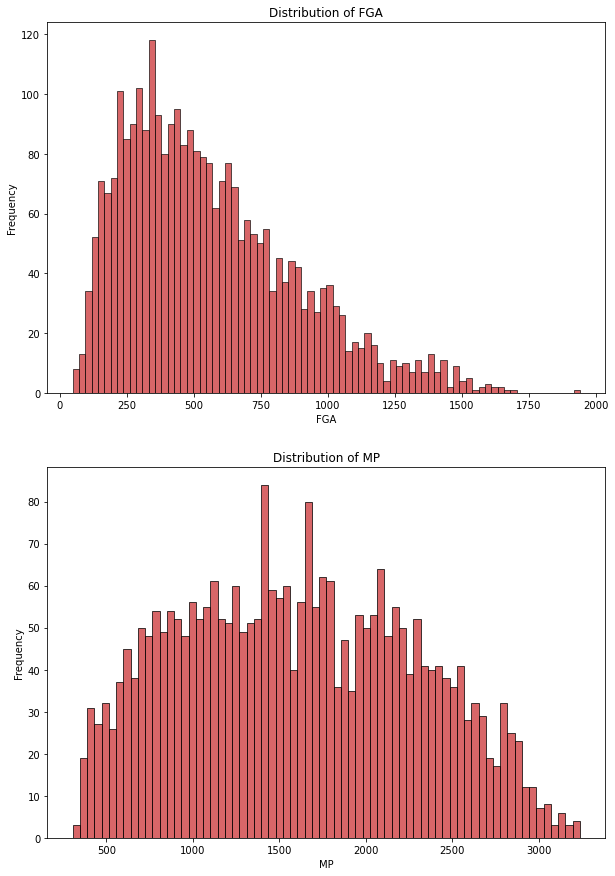

<Figure size 720x1080 with 0 Axes>

In [112]:
gs = gridspec.GridSpec(nrows = 2,ncols = 1)

fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(gs[0,0])
sns.histplot(x='FGA',bins=80, data = df, kde=False, ax = ax1)
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of FGA")

plt.figure(figsize = (10,15))
ax2 = fig.add_subplot(gs[1,0])
sns.histplot(x='MP', bins = 70, data = df, kde=False, ax = ax2)
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of MP")

fig.savefig('dist3.png')
plt.show()

> - FGA (field goal attempts) follows a unimodal distribution, with most players shooting around 400-500 times per season
> - MP (minutes played) follows a bimodal distribution, but it is almost normally distributed

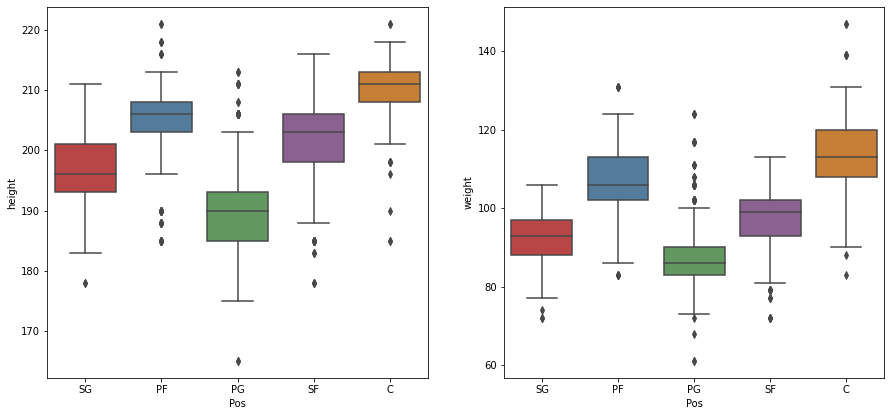

In [113]:
gs = gridspec.GridSpec(2,2)

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(gs[0,0])
sns.boxplot(x='Pos', y='height', data = df)

ax2 = fig.add_subplot(gs[0,1])
sns.boxplot(x = 'Pos', y='weight', data = df)


fig.savefig('dist4.png')
plt.show()

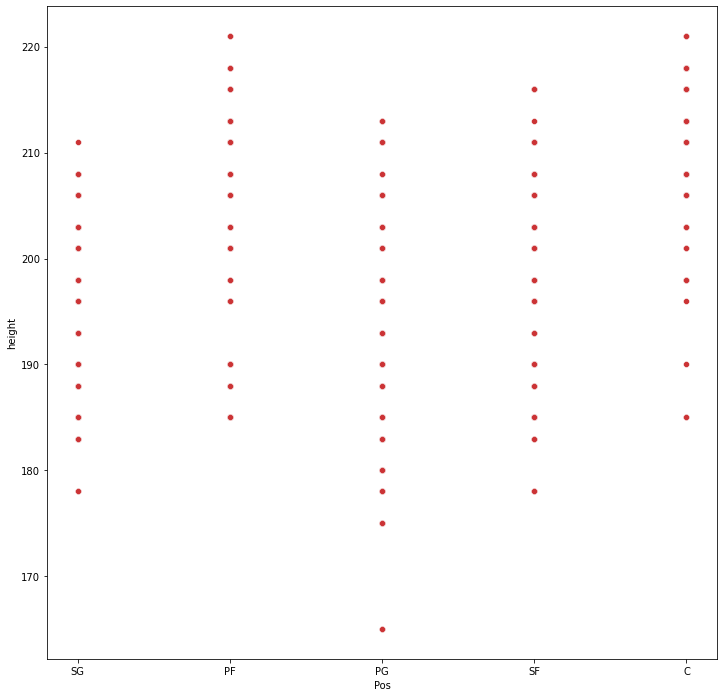

In [114]:
gs = gridspec.GridSpec(1,2)

plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.scatterplot(x='Pos', y='height', data = df)

> - As expected, centers and forwards have higher heights and weights than guards, but there are some outliers.
> - The outliers are from the many players that can play the position of guard, but are over 6'6", like Ben Simmons, or LeBron James.

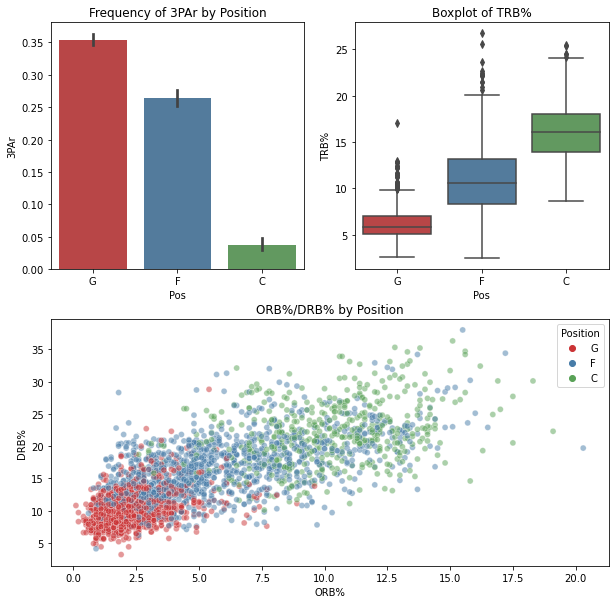

In [115]:
def temp(pos):
    if (pos == "PG") | (pos == 'SG'):
        return 'G'
    if (pos == 'SF') | (pos == 'PF'):
        return 'F'
    if pos == 'C':
        return 'C'
    
df['Pos'] = df['Pos'].apply(lambda x : temp(x))

gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Frequency of 3PAr by Position")
ax1 = sns.barplot(x='Pos', y= '3PAr', data=df)

ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.boxplot(x = 'Pos', y = 'TRB%', data = df)
ax2.set_title("Boxplot of TRB%")

ax3 = fig.add_subplot(gs[1,:])
ax3 = sns.scatterplot(x = 'ORB%', y='DRB%', data = df, hue = 'Pos', alpha = .5)
ax3.set_title("ORB%/DRB% by Position")
plt.legend(title = "Position")

fig.savefig('dist5.png')
plt.show()

> - Guards have a high relative 3PAr (3 point per field goal attempt) value
> - Centers do not shoot many three pointers relative to total field goal attempts
> - Centers and Forwards have a much higher TRB% than guards
> - There are some outliers for both Guards and Forwards for TRB%. Again, this is because there are some guards that are taller than average, and can rebound more effectively because of their height

# 5. Preprocessing for Machine Learning

In [117]:
def to_encoded(pos):
    if pos == 'G':
        return 0
    if pos == 'F':
        return 1
    if pos == 'C':
        return 2
  
    
df['y'] = df['Pos'].apply(lambda x : to_encoded(x))
df['y'].value_counts()

0    1208
1    1156
2     481
Name: y, dtype: int64

> Encoding Position to integers

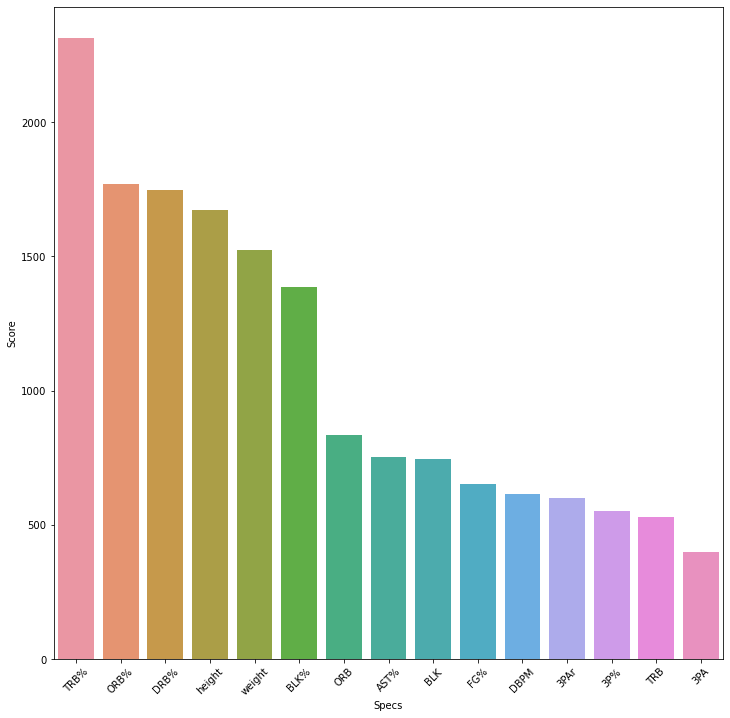

In [119]:
#Kbest features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
temp_x = df.drop(columns = ['Year', 'Player', 'Pos', 'Tm', 'G', 'GS', 'MP','blanl', 'blank2', 'y'])
temp_y = df['y']

kbest = SelectKBest(score_func = f_classif, k = 15)
fit = kbest.fit(temp_x, temp_y)
dfscores = pd.DataFrame(fit.scores_)
cols = pd.DataFrame(temp_x.columns)

scores = pd.concat([cols, dfscores], axis=1)
scores.columns = ['Specs', 'Score']

scores = scores.nlargest(15, 'Score')


fig = plt.figure(figsize = (12,12))
sns.barplot(x = 'Specs', y = 'Score', data = scores)
plt.xticks(rotation = 45)
fig.savefig('kbest.png')
plt.show()

> - The most important features make sense; players with a higher rebounding percentage are more likely to be a center.  
> - Similarly, height and weight makes sense because taller/heavier players are more likely to be a center or forward than a guard  
> - AST%, 3P%, and 3PA are important because it differentiates guards from centers or forwards

In [40]:
from sklearn.metrics import confusion_matrix
def conf_mat(y_true, y_pred):
    labels = {"G" : 0,
             "F" : 1,
             "C" : 2}
    
    mat = confusion_matrix(y_true, y_pred)
    plot = sns.heatmap(mat, annot=True, fmt = "d", linewidths = 1, cmap = "Blues", xticklabels = labels.keys(), yticklabels = labels.keys())
    return plot

In [41]:
from sklearn.model_selection import train_test_split

X = df[['TRB%', 'ORB%', 'height', 'weight', 'FG%', 'AST%', 'BLK%', 'ORB', 'BLK', 'DBPM', 'AST', 'TRB', '3PA']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.head()
X_train.columns

Index(['TRB%', 'ORB%', 'height', 'weight', 'FG%', 'AST%', 'BLK%', 'ORB', 'BLK',
       'DBPM', 'AST', 'TRB', '3PA'],
      dtype='object')

## Decision Tree Classifier with PCA

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('std', StandardScaler()) , 
    ('PCA', PCA()) , 
    ('CLF', DecisionTreeClassifier(class_weight = 'balanced'))
])
print("PCA Parameters:", pipe['PCA'].get_params())
print()
print("KMeans paramters:", pipe['CLF'].get_params())

PCA Parameters: {'copy': True, 'iterated_power': 'auto', 'n_components': None, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}

KMeans paramters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [43]:
cv = StratifiedKFold(shuffle=True)

param_grid = {"PCA__n_components" : [5, 7, 10, 12, 15] , 
             "PCA__whiten" : [True, False] , 
             "CLF__max_depth" : [3, 5, 10, 15] , 
             "CLF__criterion" : ['gini', 'entropy'] , 
             "CLF__max_features" : [5, 7, 9, 12, 15]}

grid_search = GridSearchCV(pipe,
                          param_grid,
                          verbose = 0,
                          scoring = 'accuracy',
                          cv = cv,
                          n_jobs = -1)

grid_search.fit(X_train, y_train)
base_score = grid_search.score(X_test, y_test)
print('Baseline Score:', base_score)

Baseline Score: 0.7921348314606742


In [44]:
grid_search.best_estimator_

Pipeline(steps=[('std', StandardScaler()), ('PCA', PCA(n_components=12)),
                ('CLF',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        max_features=12))])

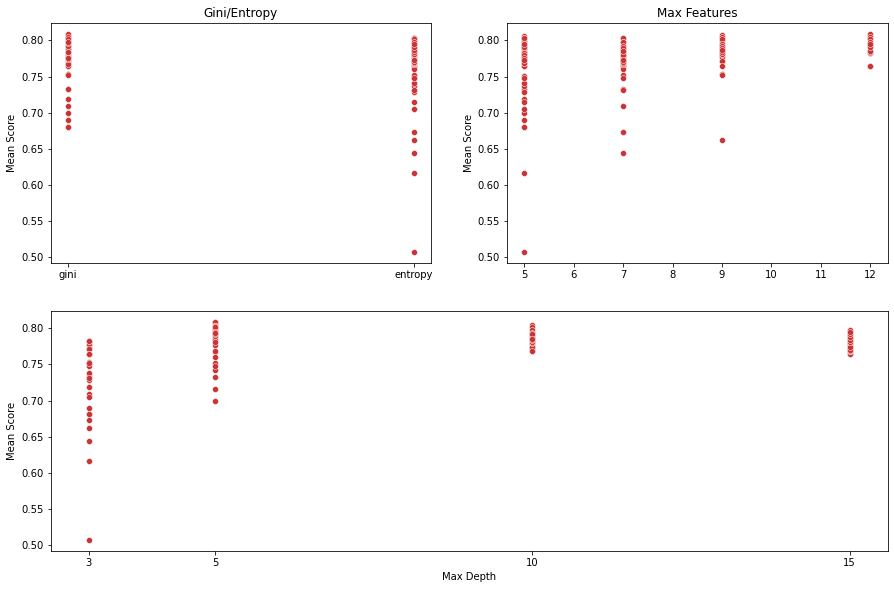

In [122]:
gs = gridspec.GridSpec(3,2)
data = grid_search.cv_results_

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.scatterplot(x = 'param_CLF__criterion', y = 'mean_test_score', data = data)
ax1.set_ylabel("Mean Score")
ax1.set_title("Gini/Entropy")
ax1.set_xlabel('')

ax2 = fig.add_subplot(gs[0,1], sharey=ax1)
ax2 = sns.scatterplot(x = "param_CLF__max_features", y = "mean_test_score", data = data)
ax2.set_ylabel('Mean Score')
ax2.set_title("Max Features")
ax2.set_xlabel('')

ax3 = fig.add_subplot(gs[1,:])
ax3 = sns.scatterplot(x = "param_CLF__max_depth", y = "mean_test_score", data = data)
ax3.set_xticks([3,5,10,15])
ax3.set_ylabel("Mean Score")
ax3.set_xlabel('Max Depth')

fig.savefig('dc_res.png')
plt.show()

> - Using gridsearch, we can see that the highest scoring trials use gini, max features of 12, and max depth of 5

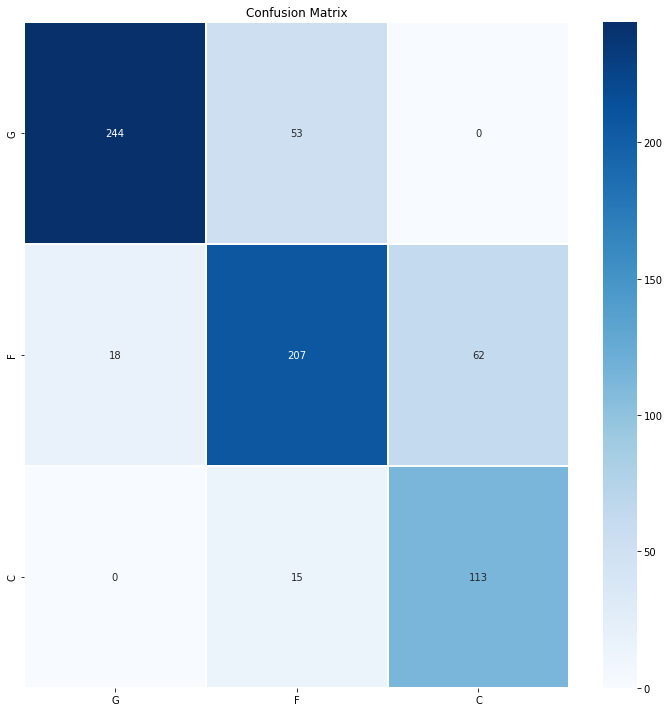

In [123]:
fig = plt.figure(figsize = (10,10))

ax4 = conf_mat(y_test, grid_search.predict(X_test))
ax4.set_title("Confusion Matrix")
fig.savefig('dc_conf.png')


plt.tight_layout()

> The confusion matrix shows the algorithm had trouble discerning centers from forwards, and guards from forwards. Since the algorithms are using height and weight as a feature, it is most likely getting confused when it sees guards that are taller than average, and incorrectly classifies them as a forward.

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = Pipeline([
    ('std', StandardScaler()),
    ("rf" , RandomForestClassifier(n_jobs = -1, class_weight = 'balanced'))
])


param_grid2 = {'rf__n_estimators' : [200, 250], 
              'rf__max_depth' : [10, 12, 15, 17 ,20],
              'rf__min_samples_split' : [5, 7, 10]}

rf_gs = GridSearchCV(pipe2,
                     param_grid2,
                     cv = cv,
                     scoring = 'accuracy'
)

rf_gs.fit(X_train, y_train)
rf_score = rf_gs.score(X_test, y_test)
print("Baseline Score:", rf_score)

Baseline Score: 0.8834269662921348


In [48]:
rf_gs.best_estimator_

Pipeline(steps=[('std', StandardScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_split=5, n_estimators=250,
                                        n_jobs=-1))])

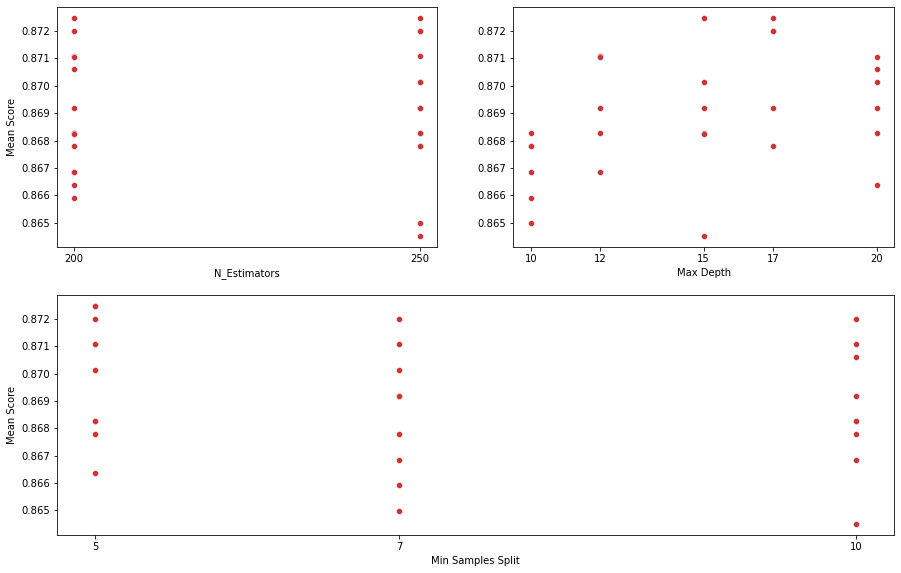

In [124]:
gs = gridspec.GridSpec(3,2)
data = rf_gs.cv_results_

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(gs[0,0])
sns.scatterplot(x = 'param_rf__n_estimators', y = 'mean_test_score', data = data)
ax1.set_xticks([200, 250])
ax1.set_ylabel("Mean Score")
ax1.set_xlabel("N_Estimators")

ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.scatterplot(x = "param_rf__max_depth", y = "mean_test_score", data = data)
ax2.set_xticks([10,12,15,17, 20])
ax2.set_ylabel('')
ax2.set_xlabel('Max Depth')

ax3 = fig.add_subplot(gs[1,:])
ax3 = sns.scatterplot(x = "param_rf__min_samples_split", y = "mean_test_score", data = data)
ax3.set_xticks([5,7,10])
ax3.set_ylabel("Mean Score")
ax3.set_xlabel("Min Samples Split")


fig.savefig('rf_res.png')

plt.show()

> - Using gridsearch, we can see that the highest scoring trials use n_estimators of 200, max depth of 20, and min samples split of 5.

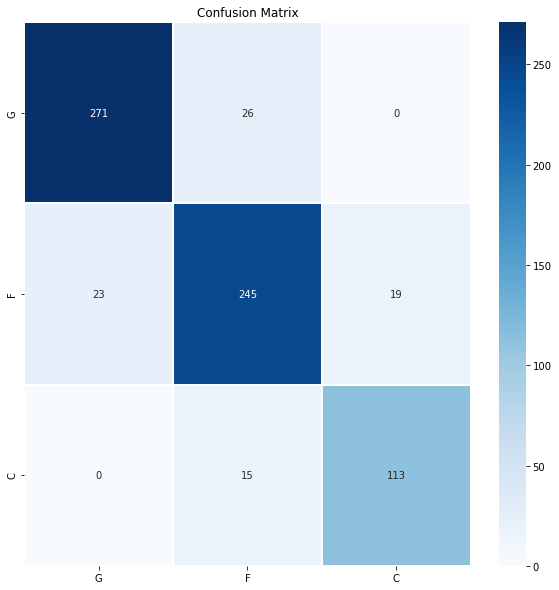

In [125]:
fig = plt.figure(figsize = (10,10))

ax4 = conf_mat(y_test, rf_gs.predict(X_test))
ax4.set_title("Confusion Matrix")
fig.savefig('rf_conf.png')

plt.show()

> Random Forest seems to be the most effective at differentiating between centers and forwards.

## K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid3 = {"knn__n_neighbors" : np.arange(3, 26, 3),
               "knn__p" : [1, 2]
}

knn_gs = GridSearchCV(pipe3,
                     param_grid3,
                     cv=cv,
                     scoring='accuracy')

knn_gs.fit(X_train, y_train)
knn_score = knn_gs.score(X_test, y_test)
print("Baseline Score:", knn_score)

Baseline Score: 0.8497191011235955


In [52]:
knn_gs.best_estimator_

Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9, p=1))])

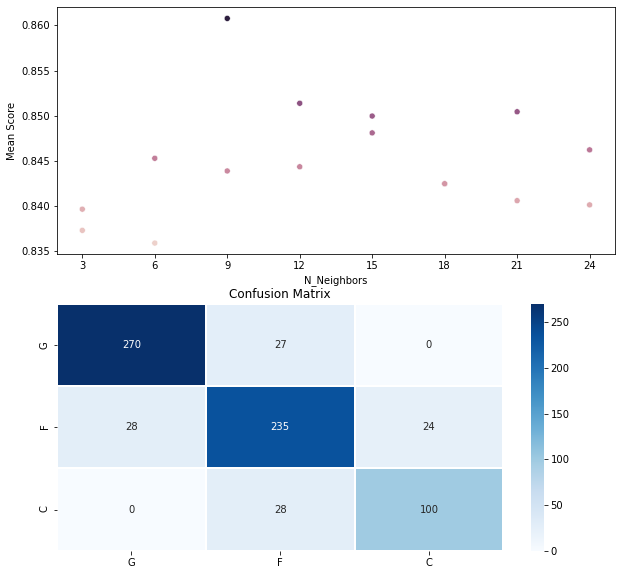

In [128]:
gs = gridspec.GridSpec(2,1)
data = knn_gs.cv_results_

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(gs[0,0])
sns.scatterplot(x = 'param_knn__n_neighbors', y = 'mean_test_score', data = data, hue="mean_test_score")
ax1.set_xticks(np.arange(3, 26, 3))
ax1.set_ylabel('Mean Score')
ax1.set_xlabel('N_Neighbors')
plt.legend([],[], frameon=False)

ax2 = fig.add_subplot(gs[1,0])
ax2.set_title("Confusion Matrix")
ax2 = conf_mat(y_test, knn_gs.predict(X_test))

fig.savefig('knn_res.png')
plt.show()

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
pipe4 = Pipeline([
    ('min_max_scale', MinMaxScaler()),
    ('svm', SVC(class_weight = 'balanced', gamma = 'scale', probability=True))
    
])

param_grid4 = {
    'svm__C':np.arange(3, 15, 1),
    'svm__kernel' : ['rbf', 'poly']
}

svc_gs = GridSearchCV(pipe4,
                     param_grid4,
                     scoring='accuracy',
                     cv=cv,
                     n_jobs=-1)

svc_gs.fit(X_train, y_train)
svc_score = svc_gs.score(X_test, y_test)
print("Baseline Score:", svc_score)

Baseline Score: 0.8525280898876404


In [55]:
svc_gs.best_estimator_

Pipeline(steps=[('min_max_scale', MinMaxScaler()),
                ('svm', SVC(C=12, class_weight='balanced', probability=True))])

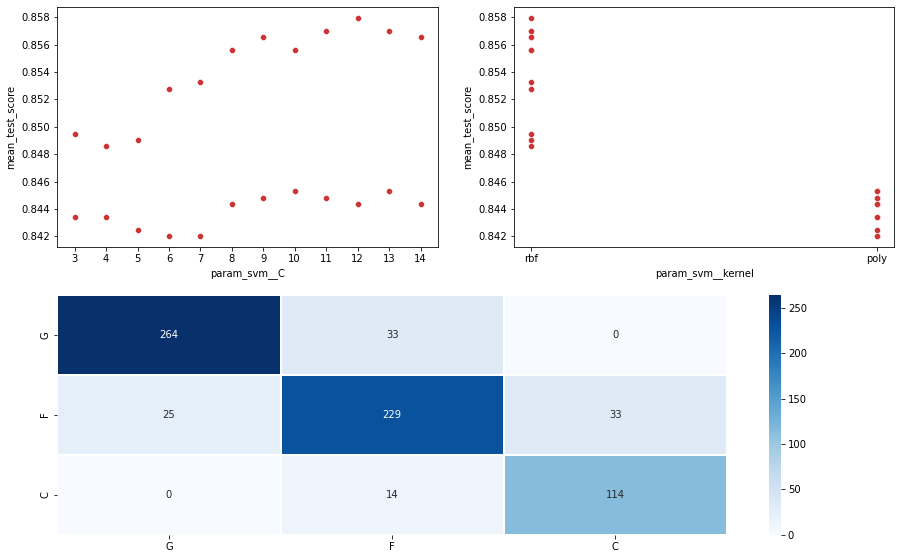

In [130]:
gs = gridspec.GridSpec(3,2)
data = svc_gs.cv_results_

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(gs[0,0])
sns.scatterplot(x = 'param_svm__C', y = 'mean_test_score', data = data)
ax1.set_xticks(np.arange(3,15,1))

ax2 = plt.subplot(gs[0,1])
ax2 = sns.scatterplot(x = "param_svm__kernel", y = "mean_test_score", data = data)



ax3 = fig.add_subplot(gs[1,:])
ax3 = conf_mat(y_test, svc_gs.predict(X_test))
fig.savefig('svc_res.png')

plt.show()

# 6. Model Comparison

In [132]:
models = [('Decision Tree', grid_search),
         ("Random Forest", rf_gs),
         ('KNN', knn_gs),
         ('SVM', svc_gs)]
def get_scores(models, y_test):
    temp = []
    for name, gs in models:
        fit = gs.cv_results_['mean_fit_time']
        fit = fit[~np.isnan(fit)]
        
        test_score = gs.cv_results_['mean_test_score']
        test_score = test_score[~np.isnan(test_score)]
        
        temp.append((name, gs.best_score_, test_score.mean(), fit.mean()))
        
    return temp

    
model_scores = get_scores(models, y_test)
scores = pd.DataFrame(model_scores, columns = ['Model', 'Best Score', 'Mean Test Score', 'Mean Fit Time'])

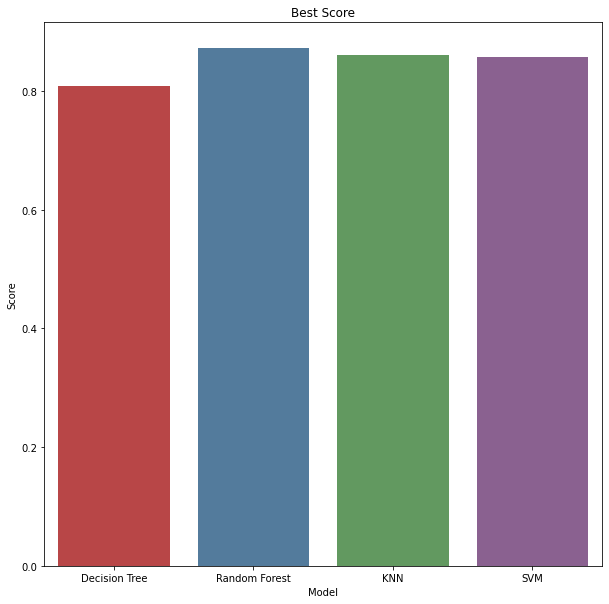

In [136]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'Model', y = 'Best Score', data = scores)
plt.ylabel('Score')
plt.title('Best Score')
fig.savefig('best_score.png')
plt.show()

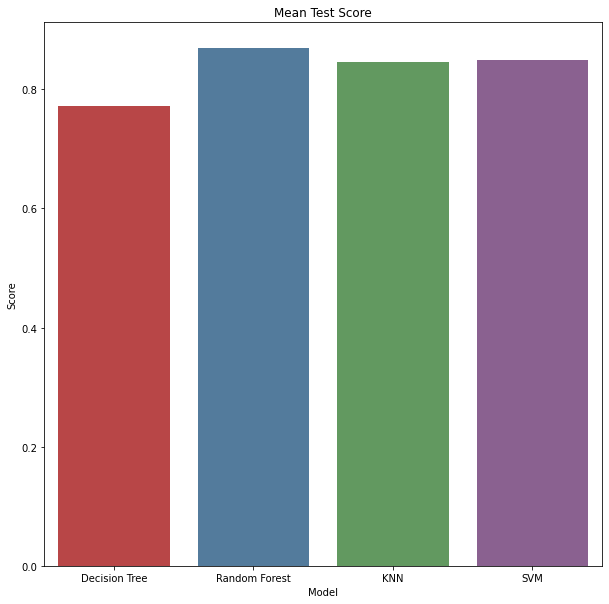

In [134]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'Model', y = 'Mean Test Score', data = scores)
plt.ylabel('Score')
plt.title('Mean Test Score')
fig.savefig('mean_score.png')

plt.show()

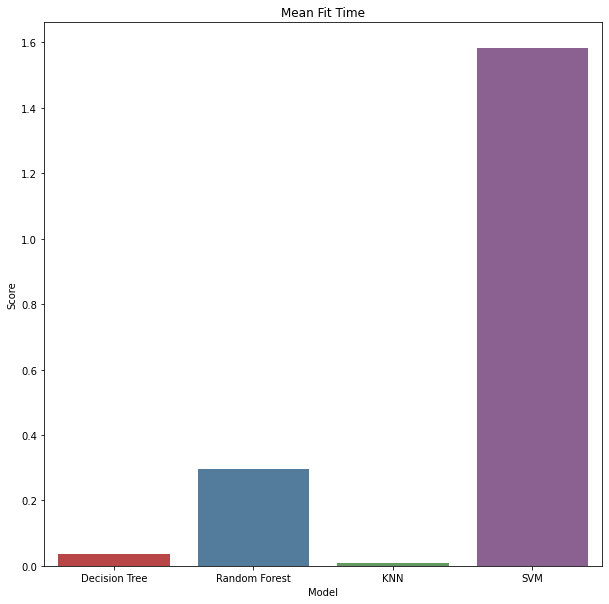

In [135]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'Model', y = 'Mean Fit Time', data = scores)
plt.ylabel('Score')
plt.title('Mean Fit Time')
fig.savefig('mean_fit_time.png')

plt.show()